In [21]:
import numpy as np
import os
import argparse
import random
import math
import json
import numpy as np
import scipy
import matplotlib.pylab as plt
#import torch
import math
import copy
import random
import os
#import cvxpy as cp
from random import randrange
import statistics 

# In[2]:


def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument("--hidden-dim", default = 20, type = int)
    parser.add_argument("--range", default = .5, type = float)
    parser.add_argument("--corruption-level", default = 0, type = float)
    parser.add_argument("--num-rounds", default = 10000, type = int)
    parser.add_argument("--num-trials", default = 10, type = int)
    parser.add_argument("--seed", type=int, default = 201912)
    parser.add_argument("--norm-a", default = 1., type = float)
    parser.add_argument("--norm-b", default = 1., type = float)
    parser.add_argument("--num-actions", default = 20, type = int)
    args = parser.parse_args()
    return args


# In[3]:


def init_vector(dim, norm):
    vec = 2 * np.random.rand(dim) - 1.
    return vec * norm / math.sqrt(dim)


# In[4]:


def init_arms(dim, norm, num):
    decision = np.random.rand(num, dim)
    for i in range(num):
        decision[i] = init_vector(dim, norm)
    return decision


# In[5]:


#dim = 10
dim = 15
sigma= 0.3
#T= 1000
T = 30000
repeat = 20
actions = 25
norm = 1
M=30
#M = 10

bmu = np.ones(dim)/ math.sqrt(dim)


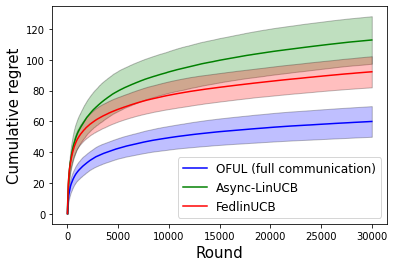

<Figure size 432x288 with 0 Axes>

In [22]:
rewardOur = np.zeros(T+1)
rewardOurrare = np.zeros(T+1)
rewardLi = np.zeros(T+1)
rewardSingle = np.zeros(T+1)
rewardOFUL = np.zeros(T+1)
finalrewardrobust = np.zeros(11)
finalrewardgreedy = np.zeros(11)
finalrewardOFUL = np.zeros(11)
avgrewardLi = np.zeros(T+1)
avgrewardOurrare = np.zeros(T+1)

totalrewardOFUL = np.zeros((repeat,T+1))
deviationOFUL= np.zeros(T+1)
totalrewardOurrare = np.zeros((repeat,T+1))
deviationOurrare= np.zeros(T+1)
totalrewardLi = np.zeros((repeat,T+1))
deviationLi= np.zeros(T+1)



for jjjj in range(repeat):
    line1=0
    path  = "OFUL_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOFUL[line1]=rewardOFUL[line1]+float(line)
        totalrewardOFUL[jjjj,line1] = float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardOFUL[i] = rewardOFUL[i]/repeat
    deviationOFUL[i] = statistics.stdev(totalrewardOFUL[:,i])
x=list(range(T))
#plt.plot(x, rewardOFUL[0:T],color='blue', label='OFUL with full communication')
plt.plot(x, rewardOFUL[0:T],color='blue', label='OFUL (full communication)')
plt.fill_between(x, rewardOFUL[0:T]-deviationOFUL[0:T], rewardOFUL[0:T]+deviationOFUL[0:T],
    alpha=0.25, edgecolor='black', facecolor='blue')




for jjjj in range(repeat):
    line1=0
    path  = "Li_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardLi[line1]=rewardLi[line1]+float(line)
        totalrewardLi[jjjj,line1] = float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardLi[i] = rewardLi[i]/repeat
    avgrewardLi[i] = rewardLi[i]/(i+1)
    deviationLi[i] = statistics.stdev(totalrewardLi[:,i])
x=list(range(T))
#plt.plot(x, rewardLi[0:T],color='green', label='Async-LinUCB')

plt.plot(x, rewardLi[0:T],color='green', label='Async-LinUCB')
plt.fill_between(x, rewardLi[0:T]-deviationLi[0:T], rewardLi[0:T]+deviationLi[0:T],
    alpha=0.25, edgecolor='black', facecolor='green')

for jjjj in range(repeat):
    line1=0
    path  = "Ourrare_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOurrare[line1]=rewardOurrare[line1]+float(line)
        totalrewardOurrare[jjjj,line1] = float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardOurrare[i] = rewardOurrare[i]/repeat
    avgrewardOurrare[i] = rewardOurrare[i]/(i+1)
    deviationOurrare[i] = statistics.stdev(totalrewardOurrare[:,i])
    
x=list(range(T))
#plt.plot(x, rewardOurrare[0:T],color='black', label='FedlinUCB')
plt.plot(x, rewardOurrare[0:T],color='red', label='FedlinUCB')
plt.fill_between(x, rewardOurrare[0:T]-deviationOurrare[0:T], rewardOurrare[0:T]+deviationOurrare[0:T],
    alpha=0.25, edgecolor='black', facecolor='red')

plt.legend(fontsize=12)
plt.xlabel('Round',size = 15)
# naming the y axis
plt.ylabel('Cumulative regret',size = 15)
# giving a title to my graph
plt.savefig(os.path.join('01_pdf' + "15.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./6666.jpg')

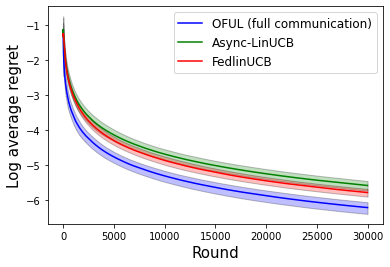

<Figure size 432x288 with 0 Axes>

In [24]:
rewardOur = np.zeros(T+1)
rewardOurrare = np.zeros(T+1)
rewardLi = np.zeros(T+1)
rewardSingle = np.zeros(T+1)
rewardOFUL = np.zeros(T+1)
finalrewardrobust = np.zeros(11)
finalrewardgreedy = np.zeros(11)
finalrewardOFUL = np.zeros(11)
avgrewardOFUL = np.zeros(T+1)
avgrewardLi = np.zeros(T+1)
avgrewardOurrare = np.zeros(T+1)

for jjjj in range(repeat):
    line1=0
    path  = "OFUL_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOFUL[line1]=rewardOFUL[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardOFUL[i] = rewardOFUL[i]/repeat
    avgrewardOFUL[i] = rewardOFUL[i]/(i+1)
    deviationOFUL[i] = deviationOFUL[i]/(i+1)
x=list(range(T))
#plt.plot(x, np.log(avgrewardOFUL[0:T]),color='blue', label='OFUL with full communication')

plt.plot(x, np.log(avgrewardOFUL[0:T]),color='blue', label='OFUL (full communication)')
plt.fill_between(x, np.log(avgrewardOFUL[0:T]-deviationOFUL[0:T]), np.log(avgrewardOFUL[0:T]+deviationOFUL[0:T]),
    alpha=0.25, edgecolor='black', facecolor='blue')


for jjjj in range(repeat):
    line1=0
    path  = "Li_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardLi[line1]=rewardLi[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardLi[i] = rewardLi[i]/repeat
    avgrewardLi[i] = rewardLi[i]/(i+1)
    deviationLi[i] = deviationLi[i]/(i+1)
x=list(range(T))
#plt.plot(x, np.log(avgrewardLi[0:T]),color='green', label='Async-LinUCB')

plt.plot(x, np.log(avgrewardLi[0:T]),color='green', label='Async-LinUCB')
plt.fill_between(x, np.log(avgrewardLi[0:T]-deviationLi[0:T]), np.log(avgrewardLi[0:T]+deviationLi[0:T]),
    alpha=0.25, edgecolor='black', facecolor='green')

for jjjj in range(repeat):
    line1=0
    path  = "Ourrare_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        rewardOurrare[line1]=rewardOurrare[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    rewardOurrare[i] = rewardOurrare[i]/repeat
    avgrewardOurrare[i] = rewardOurrare[i]/(i+1)
    deviationOurrare[i] = deviationOurrare[i]/(i+1)
x=list(range(T))
#plt.plot(x, np.log(avgrewardOurrare[0:T]),color='black', label='FedlinUCB')

plt.plot(x, np.log(avgrewardOurrare[0:T]),color='red', label='FedlinUCB')
plt.fill_between(x, np.log(avgrewardOurrare[0:T]-deviationOurrare[0:T]), np.log(avgrewardOurrare[0:T]+deviationOurrare[0:T]),
    alpha=0.25, edgecolor='black', facecolor='red')

plt.legend(fontsize=12)
plt.xlabel('Round',size = 15)
# naming the y axis
plt.ylabel('Log average regret',size = 15)
# giving a title to my graph
plt.savefig(os.path.join('02_pdf' + "15.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./6666.jpg')

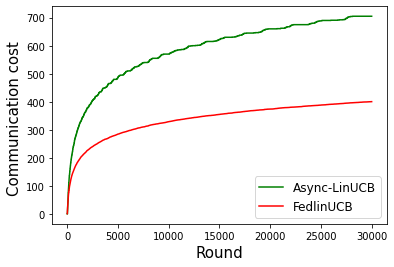

<Figure size 432x288 with 0 Axes>

In [49]:
costOur = np.zeros(T+1)
costOurrare = np.zeros(T+1)
costLi = np.zeros(T+1)
costSingle = np.zeros(T+1)
costOFUL = np.zeros(T+1)
cosLi = np.zeros(T+1)
cosOur = np.zeros(T+1)
reLi = np.zeros(T+1)
reOur = np.zeros(T+1)
finalrewardLi = np.zeros(T+1)
finalrewardOurrare = np.zeros(T+1)
finalLi = np.zeros(T+1)
finalOur = np.zeros(T+1)
finalrewardOFUL = np.zeros(11)
maxcost1 = 0
maxcost2 = 0
for jjjj in range(repeat):
    line1=0
    path  = "OFUL_cost_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        costOFUL[line1]=costOFUL[line1]+float(line)
        line1+=1
    fr.close() 
for i in range(T):
    costOFUL[i] = costOFUL[i]/repeat

#x=list(range(T))
#plt.plot(x, costOFUL[0:T],color='blue', label='OFUL')

totalOurrare = np.zeros((repeat,T+1))
devOurrare= np.zeros(T+1)
totalLi = np.zeros((repeat,T+1))
devLi= np.zeros(T+1)


for jjjj in range(repeat):
    line1=0
    path  = "Li_cost_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        costLi[line1]=costLi[line1]+float(line)
        cosLi[line1] = int(line)
        totalLi[jjjj,line1] = float(line)
        line1+=1
    fr.close() 
    line1=0
    path  = "Li_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        reLi[line1]=float(line)
        line1+=1
    fr.close() 
    for i in range(T):
        finalLi[int(cosLi[i])+1]= reLi[i]
        if (finalLi[int(cosLi[i])]==0):
            finalLi[int(cosLi[i])]= reOur[i]
        if (cosLi[i]>maxcost2):
            maxcost2=cosLi[i]
    for i in range(int(maxcost2)+1):
        finalrewardLi[i]+=finalLi[i]
        if (finalLi[i+1]==0):
            finalLi[i+1]=finalLi[i]
for i in range(T):
    costLi[i] = costLi[i]/repeat
    devLi[i] = statistics.stdev(totalLi[:,i])

for i in range(int(maxcost2)+1):
    finalrewardLi[i] = finalLi[i]/repeat
    
x=list(range(T))
#plt.plot(x, costLi[0:T],color='green', label='Async-LinUCB')
plt.plot(x, costLi[0:T],color='green', label='Async-LinUCB')
#plt.fill_between(x, costLi[0:T]-devLi[0:T], costLi[0:T]+devLi[0:T],alpha=0.25, edgecolor='black', facecolor='green')



for jjjj in range(repeat):
    line1=0
    path  = "Ourrare_cost_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        costOurrare[line1]=costOurrare[line1]+float(line)
        cosOur[line1] = int(line)
        totalOurrare[jjjj,line1] = float(line)
        line1+=1
    fr.close()
    line1=0
    path  = "Ourrare_lowerbound_" + str(jjjj)+".txt"
    fr = open(path,'r')
    for line in fr:
        reOur[line1]=float(line)
        line1+=1
    fr.close() 
    for i in range(T):
        finalOur[int(cosOur[i])+1]= reOur[i]
        if (finalOur[int(cosOur[i])]==0):
            finalOur[int(cosOur[i])]= reOur[i]
        if (cosOur[i]>maxcost1):
            maxcost1=cosOur[i]
    for i in range(int(maxcost1)+1):
        finalrewardOurrare[i]+=finalOur[i]
        if (finalOur[i+1]==0):
            finalOur[i+1]=finalOur[i]
for i in range(T):
    costOurrare[i] = costOurrare[i]/repeat
    devOurrare[i] = statistics.stdev(totalOurrare[:,i])
for i in range(int(maxcost1)+1):
    finalrewardOurrare[i] = finalOur[i]/repeat
    
x=list(range(T))
#plt.plot(x, costOurrare[0:T],color='red', label='FedlinUCB')
plt.plot(x, costOurrare[0:T],color='red', label='FedlinUCB')
#plt.fill_between(x, costOurrare[0:T]-devOurrare[0:T], costOurrare[0:T]+devOurrare[0:T],alpha=0.25, edgecolor='black', facecolor='red')


plt.legend(fontsize=12)
plt.xlabel('Round',size = 15)
# naming the y axis
plt.ylabel('Communication cost ',size = 15)
# giving a title to my graph
plt.savefig(os.path.join('03_pdf' + "15.pdf"), dpi=100)
# function to show the plot
plt.show()
fig=plt.gcf()
fig.savefig('./6666.jpg')